# Delta function propagation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [4]:
A = SlabExact(symmetric=True)  # simple core cladding step refractive index

# Delta input function

In [5]:
A.delta_at_x?

Signature: A.delta_at_x(Z, x=0, F=None, field_type='TE', sign='+1')
Docstring: <no docstring>
File:      ~/local/slab/slab.py
Type:      method

## Propagation using delta input

In [55]:
# Set extra arguments
field_type = 'TE'
sign = '+1'
x = 0
exact_args = {'field_type':field_type, 
              'sign': sign, 
              'x': x,
             }


In [56]:
A.delta_at_x(1, **exact_args)

array([0.59829132+0.j])

In [57]:
xs = np.linspace(-20,20,2000)

In [58]:
Propagator = A.propagator()

In [77]:
P = Propagator(exact_transform=A.delta_at_x, 
               exact_args=exact_args, supply_Fs_to_transform=True,
               Lx=-1, Rx=1, LZ=0, RZ=20, NZ=1000, 
               field_type=field_type, sign='+1')

0 / 1000
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000

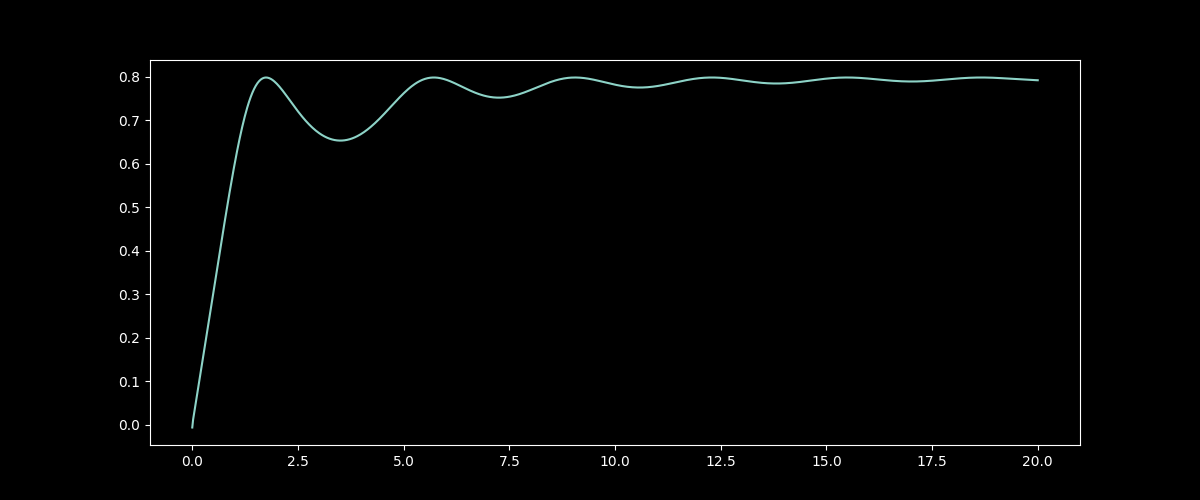

In [103]:
fig, ax = plt.subplots(1, figsize=(12,5))
ax.plot(P.Zs, P.alphas.real);

# Cross sections at input and overhead views
Just the radiation portion, no guided yet

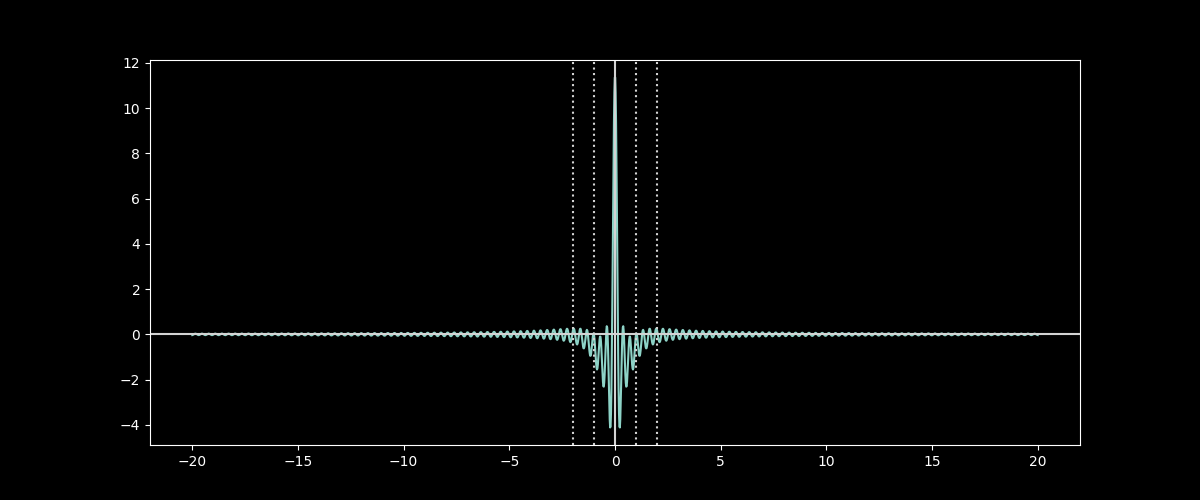

In [79]:
A.plot_field_1d(P.slice_propagate, xs=xs)  # full radiation

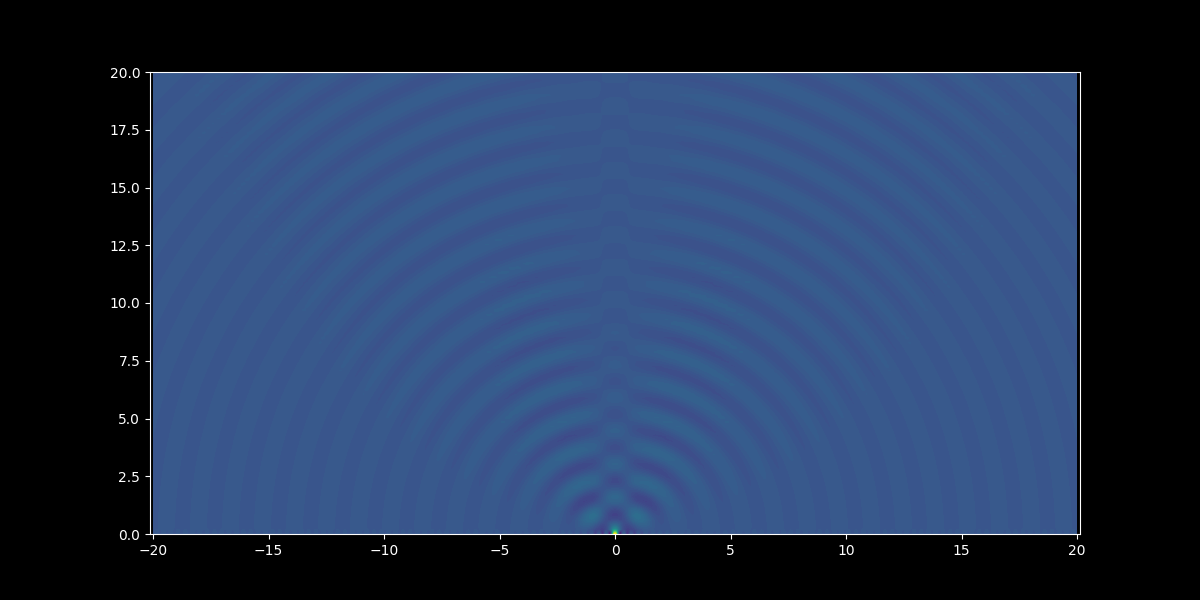

In [80]:
A.plot_field_2d(P.propagate, 'full', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

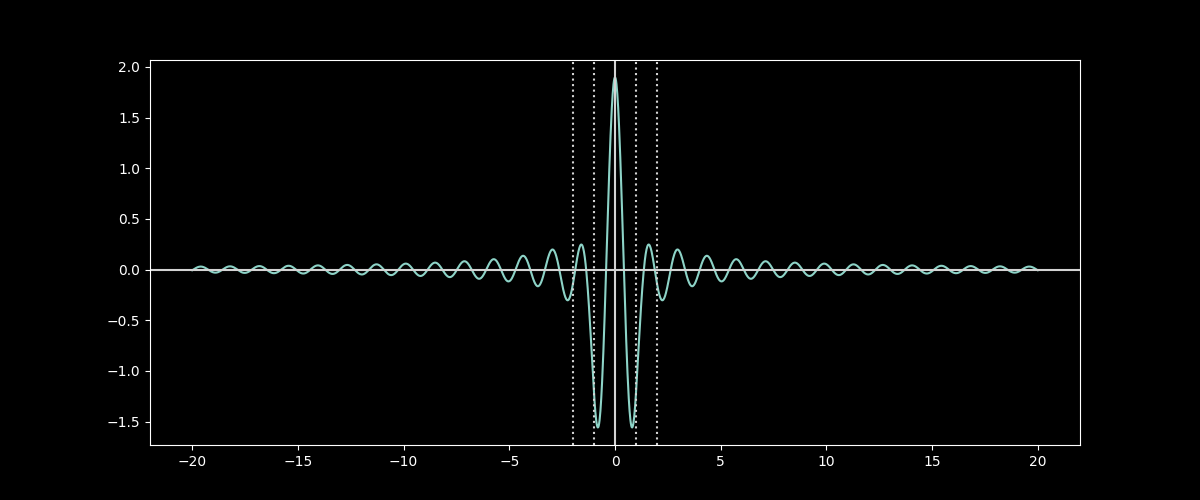

In [81]:
A.plot_field_1d(P.slice_propagate, 0, 'z', 'propagating', xs=xs)  # Just propagating

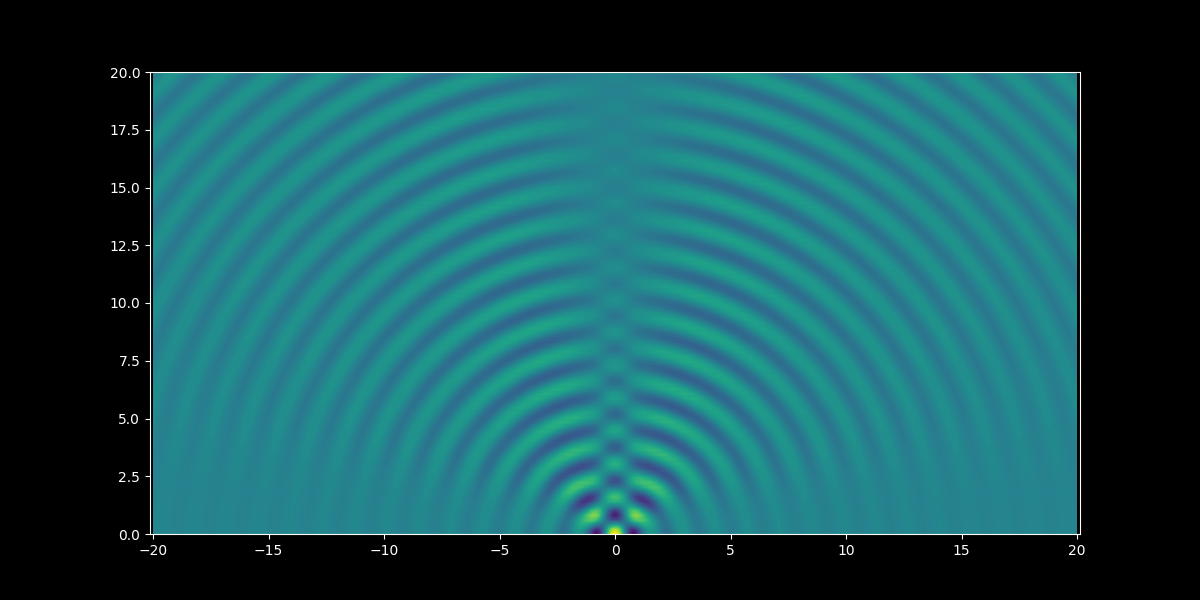

In [84]:
A.plot_field_2d(P.propagate, 'propagating', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

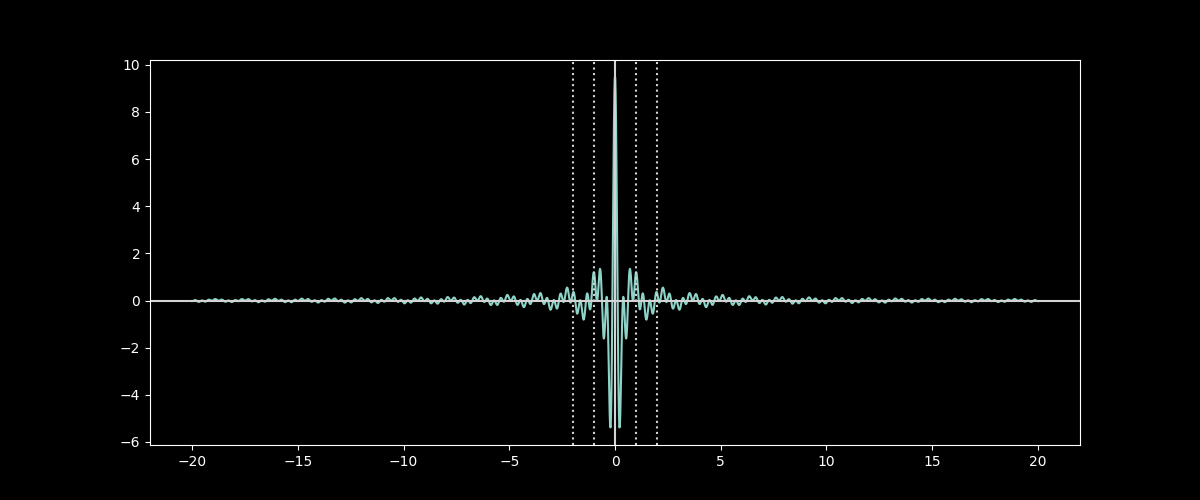

In [85]:
A.plot_field_1d(P.slice_propagate, 0, 'z', 'evanescent', xs=xs)

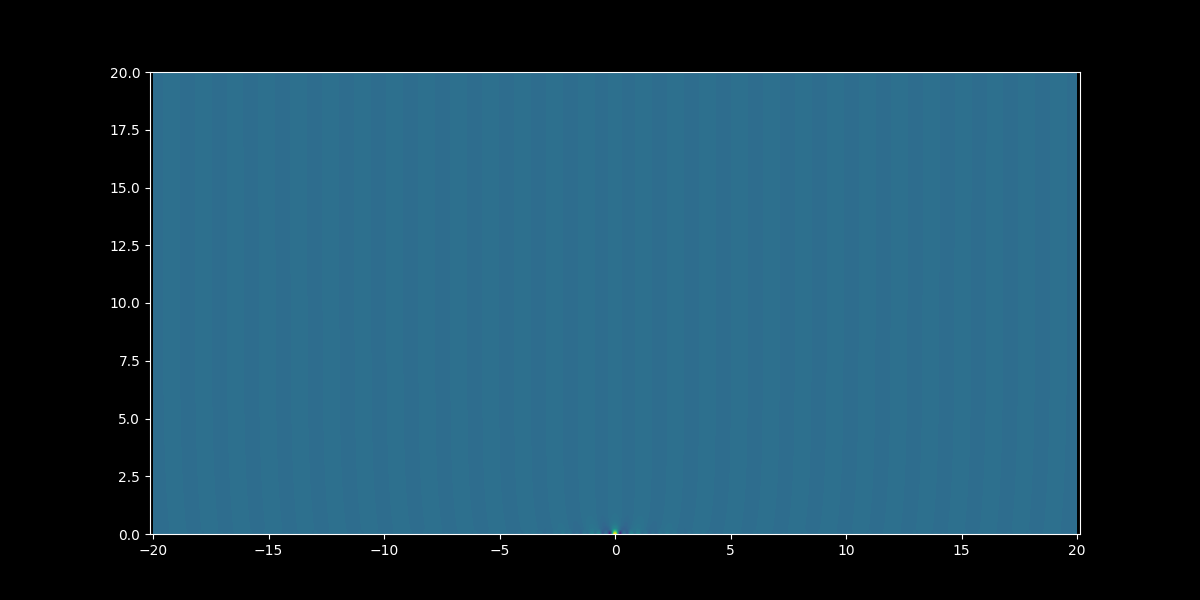

In [86]:
A.plot_field_2d(P.propagate, 'evanescent', xs=xs, zmax=20, figsize=(12,6), colorbar=False);
plt.axis('equal');

# Surface Plot

Full radiation field

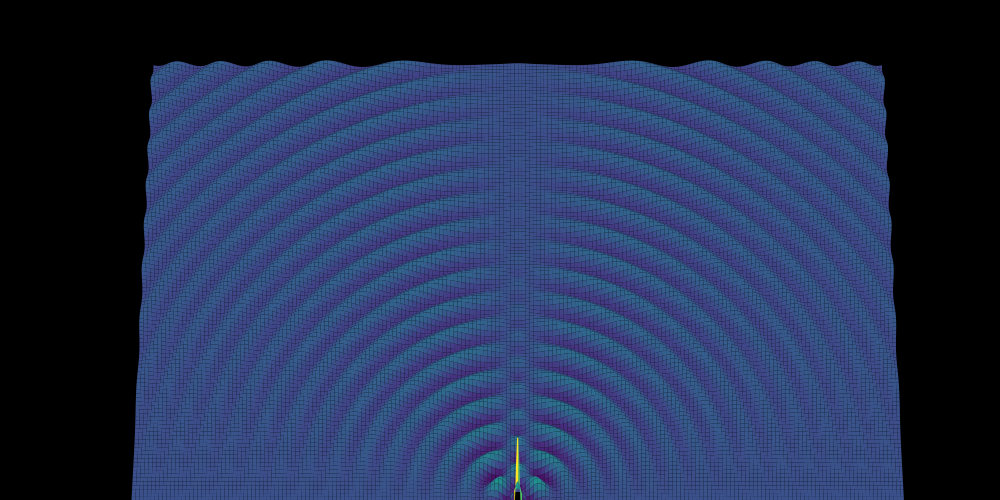

In [87]:
A.plot_field_2d(P.propagate, surface=True, xs=np.linspace(-20,20,800), colorbar=False, zoom=3,
                azim=-90, elev=75, 
                zmax=24, zref=480,
                rstride=4, cstride=4,
               )

## Add in guided mode

There is one even and one odd guided mode.  Let's try and add multiples of the guided one.

In [88]:
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton
from scipy.integrate import quad

In [89]:
beta3 = newton(A.determinant, 4.75, args=('TE', 'guided')).real
beta4 = newton(A.determinant, 5.1, args=('TE', 'guided')).real

Fs3 = A.fields(beta3, field_type='TE', mode_type='guided')
Fs4 = A.fields(beta4, field_type='TE', mode_type='guided')

In [90]:
# A.plot_field_1d(Fs4, plot_axis=True,xs=xs, linewidth=.9, color='g', label='TE_even', plot_regions=True, hatch=None)
# ax = plt.gca()
# A.add_1d_plot(ax, lambda x: 4*Fs4(0).real*f0(x), xs=xs)

In [91]:
# A.plot_field_2d(Fs4, surface=True, xs=np.linspace(-20,20,1500), colorbar=False, zoom=3,
#                 azim=-90, elev=75, 
#                 zmax=24, zref=480,
#                 rstride=5, cstride=5, 
#                )

In [92]:
integrand = lambda x: Fs4(x) * Fs4(x).conjugate()
cf1 = quad(integrand, -35,35, complex_func=True)[0].real

In [93]:
cf2 = Fs4(0)

In [94]:
alpha = cf2/cf1

In [100]:
alpha

array([3.19517973+0.j])

In [98]:
full = lambda x: P.slice_propagate(x) + alpha * Fs4(x)
Full = lambda x, zs: P.propagate(x, zs=zs) + alpha * Fs4(x, zs=zs)

## Full field slice at input end

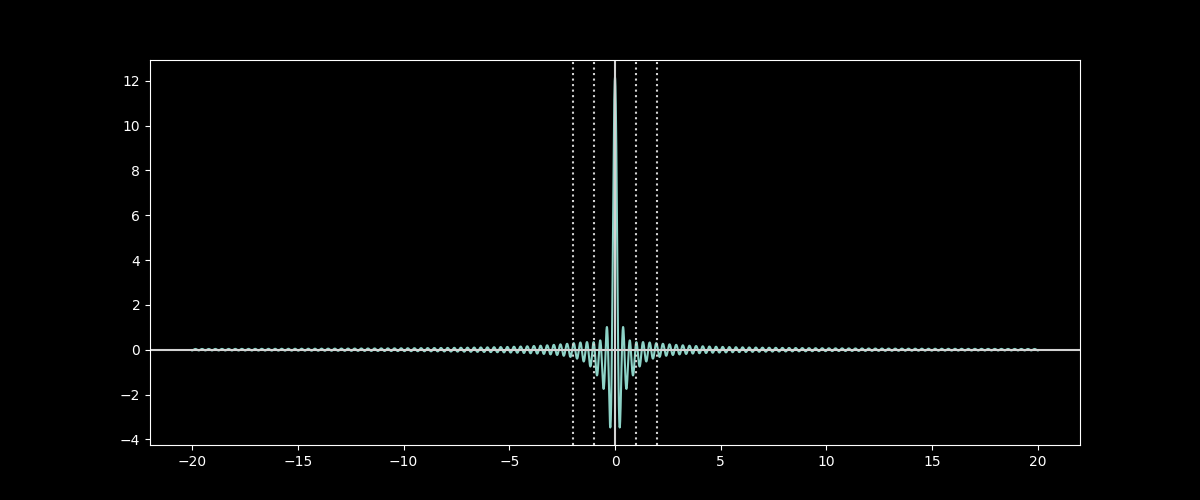

In [99]:
A.plot_field_1d(full, xs=np.linspace(-20,20,10000), part='real')


## Full Field

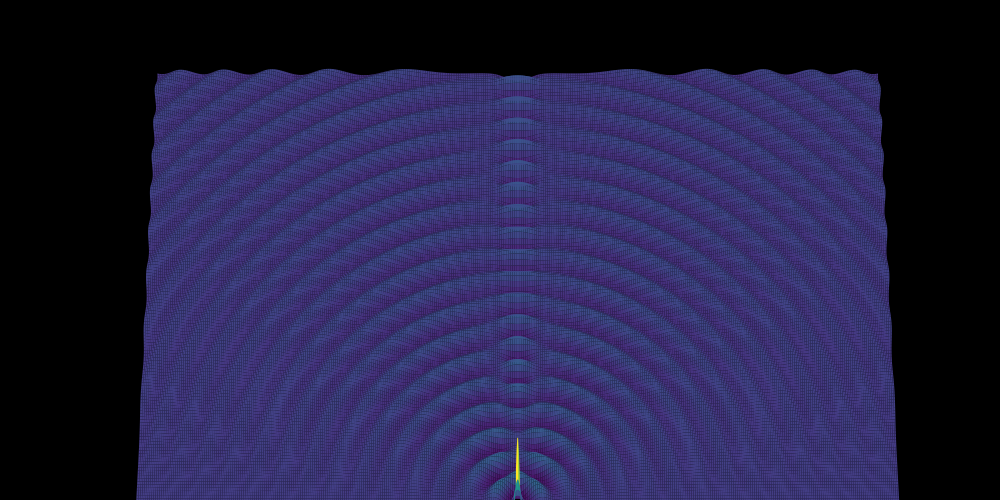

In [101]:
A.plot_field_2d(Full, surface=True, xs=np.linspace(-20,20,1200), colorbar=False, zoom=3,
                azim=-90, elev=75, 
                zmax=24, zref=480,
                rstride=5, cstride=5,
               )

# Save data for three.js visualization

Input function for line

In [7]:
f0s = f0(xs)

Field strengths, divided into guided, evanescent radiation and propagating radiation

In [17]:
rad_ys_propagating = Psci.propagate(np.linspace(-20,20,1200), zs=np.linspace(0,24,480), portion='propagating')
rad_ys_evanescent = Psci.propagate(np.linspace(-20,20,1200), zs=np.linspace(0,24,480), portion='evanescent')

In [18]:
guided_ys = alpha * Fs4(np.linspace(-20,20,1200), zs=np.linspace(0,24,480))

Underlying grid points

In [19]:
Xs, Zs = np.meshgrid(np.linspace(-20,20,1200), np.linspace(0,24,480))

## Functions for data organization and saving

In [14]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [12]:
prefix='/home/pv/learning/index_buffered/'

In [42]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [44]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [45]:
save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [46]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [47]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [13]:
save_values_as_json(prefix + 'f0s', f0s)

In [15]:
save_values_as_json(prefix + 'x0s', xs)